In [69]:
# -*- coding:utf-8 -*-
# !/usr/bin/python
# Author: Selvaria
# 基于实际图片数据增强后的卷积模型

import pandas
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

df_data = pandas.read_csv(r'D:\data\Kaggle\MNIST\train.csv')
train_dir = 'D:/data/Kaggle/MNIST/picture/train'
test_dir = 'D:/data/Kaggle/MNIST/picture/test'

train_datagen = ImageDataGenerator(
    rescale = 1/255, #对图片的每个像素值均乘上这个放缩因子，把像素值放缩到0和1之间有利于模型的收敛
    rotation_range = 20, #角度值，0-180.表示图像随机旋转的角度范围
    width_shift_range = 0.1, #平移比例，下同
    height_shift_range = 0.1,
    shear_range = 0.2, #随机错切变换角度
    zoom_range = 0.2, #随机缩放比例
    horizontal_flip = False, #随机将一半图像水平翻转，主要用于真实世界的图像（即没有水平不对称的假设前提下）
    zca_whitening=True, #白化处理，只适用于mnist这种只有1条通道的黑白图像
    fill_mode='nearest' #填充新创建像素的方法
)

test_datagen = ImageDataGenerator(rescale=1/255) #注意验证集的数据不能增强


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (28, 28),
    batch_size = 200, #每批量样本大小
    color_mode='grayscale',
    class_mode = 'categorical' #因为使用了categorical_crossentropy损失函数，所以用二进制标签
)

test_generator = test_datagen.flow_from_directory(
    test_dir, 
    target_size = (28, 28),
    batch_size = 20,
    color_mode='grayscale',
    class_mode = 'categorical' 
)

D:\Selvaria\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:334: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 40000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [70]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras import models

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'same',activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same', activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
__________

In [71]:
from keras.optimizers import RMSprop
from keras.callbacks import ReduceLROnPlateau

optimizer = RMSprop(lr=0.001, epsilon=1e-08)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [72]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch = 200, #40000/200
    epochs = 30, #增加了训练批次
    validation_data = test_generator, 
    callbacks=[learning_rate_reduction],
    validation_steps = 100 #2000/20
)

Epoch 1/30


D:\Selvaria\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
D:\Selvaria\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:718: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


200/200 [==============================] - 142s 708ms/step - loss: 1.3344 - acc: 0.5335 - val_loss: 0.2646 - val_acc: 0.9080
Epoch 2/30
200/200 [==============================] - 138s 691ms/step - loss: 0.4385 - acc: 0.8646 - val_loss: 0.1286 - val_acc: 0.9540
Epoch 3/30
200/200 [==============================] - 140s 699ms/step - loss: 0.2860 - acc: 0.9125 - val_loss: 0.0855 - val_acc: 0.9750
Epoch 4/30
200/200 [==============================] - 134s 671ms/step - loss: 0.2223 - acc: 0.9322 - val_loss: 0.0694 - val_acc: 0.9800
Epoch 5/30
200/200 [==============================] - 138s 692ms/step - loss: 0.1908 - acc: 0.9432 - val_loss: 0.0677 - val_acc: 0.9800
Epoch 6/30
200/200 [==============================] - 139s 695ms/step - loss: 0.1669 - acc: 0.9497 - val_loss: 0.0616 - val_acc: 0.9810
Epoch 7/30
200/200 [==============================] - 134s 671ms/step - loss: 0.1470 - acc: 0.9552 - val_loss: 0.0675 - val_acc: 0.9810
Epoch 8/30
200/200 [==============================] - 135s 

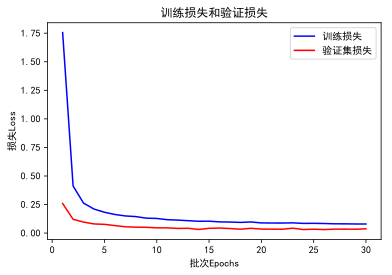

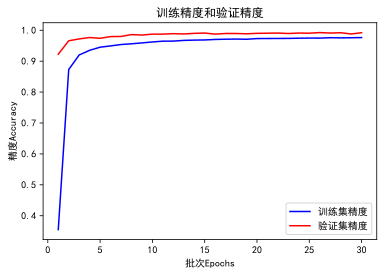

In [25]:
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg' #画的图更清晰

plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False  

history_dict = history.history
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(loss_values)+1)

plt.plot(epochs, loss_values,'b',label='训练损失') 
plt.plot(epochs, val_loss_values,'r',label='验证集损失') 
plt.title('训练损失和验证损失')
plt.xlabel('批次Epochs')
plt.ylabel('损失Loss')
plt.legend()
plt.figure()

plt.plot(epochs, acc,'b',label='训练集精度') 
plt.plot(epochs, val_acc,'r',label='验证集精度') 
plt.title('训练精度和验证精度')
plt.xlabel('批次Epochs')
plt.ylabel('精度Accuracy')
plt.legend()

plt.show()

In [87]:
print(model.evaluate_generator(test_generator, steps = 100))

[0.033690347924311935, 0.9899999976158143]


In [62]:
submit_dir = 'D:/data/Kaggle/MNIST/picture/submit' #注意还要再向下建立一个文件夹

submit_datagen = ImageDataGenerator(rescale=1/255)
submit_generator = submit_datagen.flow_from_directory(
    submit_dir, 
    target_size = (28, 28),
    batch_size = 1,
    class_mode = 'categorical' 
)

#print(data_input.shape)

Found 28000 images belonging to 1 classes.


In [82]:
df_submit = pandas.read_csv(r'D:\data\Kaggle\MNIST\test.csv')
data_submit = df_submit.values
data_input = data_submit.reshape(data_submit.shape[0], 28, 28, 1)
print(data_input.shape)

(28000, 28, 28, 1)


In [88]:
prediction = model.predict(data_input)
result = np.argmax(prediction[0])
result

2

In [86]:
np.argmax(prediction[10])

3

In [79]:
prediction.shape

(28000, 10)

In [81]:
df_submit = pandas.read_csv(r'D:\data\Kaggle\MNIST\sample_submission.csv')
for i in range(len(prediction)):
    result_label = np.argmax(prediction[i])
    df_submit.loc[i, 'Label'] = result_label

df_submit.to_csv(r'D:\data\Kaggle\MNIST\mnist_submission_enhanced.csv', index=False)

In [65]:
import numpy as np
#submit_generator.reset()
label_dict = submit_generator.class_indices
print(label_dict)
prediction = model.predict_generator(submit_generator, steps = 1, max_queue_size=1, verbose=1)
#print(submit_generator.filenames)
print(prediction)
print(prediction.shape)
result0 = np.argmax(prediction[0])
#result1 = np.argmax(prediction[1])
#result2 = np.argmax(prediction[2])
#print(result[0], result[1], result[2])
print(result0)

{'00': 0}
1/1 [==============================] - 0s 98ms/step
[[5.1640083e-13 1.2166975e-15 5.3052520e-15 5.5505939e-08 9.7311253e-15
  9.9999988e-01 1.1655182e-11 5.1597499e-15 4.7296812e-11 1.4622947e-07]]
(1, 10)
5
